In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/insurance.csv'  # Replace with your file path
insurance_data = pd.read_csv(file_path)

# a) Create Vectors
age_vector = insurance_data['age'].tolist()  # Age vector
bmi_vector = insurance_data['bmi'].tolist()  # BMI vector
expenses_vector = insurance_data['expenses'].tolist()  # Expenses vector

# b) Create Factors (categories)
sex_factor = pd.Categorical(insurance_data['sex'])
smoker_factor = pd.Categorical(insurance_data['smoker'])
region_factor = pd.Categorical(insurance_data['region'])

# c) Create a List
insurance_list = {
    'age': age_vector,
    'bmi': bmi_vector,
    'expenses': expenses_vector
}

# d) Create a Matrix (age and bmi for the first few rows)
matrix = insurance_data[['age', 'bmi']].head(10).to_numpy()

# e) Create a DataFrame
data_frame = insurance_data[['age', 'sex', 'bmi', 'expenses']].head(10)

# Print Outputs
print("Vectors:")
print("Age Vector:", age_vector[:10])  # Print first 10 entries
print("BMI Vector:", bmi_vector[:10])
print("Expenses Vector:", expenses_vector[:10])

print("\nFactors:")
print("Sex Factor:", sex_factor.categories)
print("Smoker Factor:", smoker_factor.categories)
print("Region Factor:", region_factor.categories)

print("\nList:")
print(insurance_list)

print("\nMatrix (Age and BMI):")
print(matrix)

print("\nData Frame (Sample):")
print(data_frame)


Vectors:
Age Vector: [19, 18, 28, 33, 32, 31, 46, 37, 37, 60]
BMI Vector: [27.9, 33.8, 33.0, 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8]
Expenses Vector: [16884.92, 1725.55, 4449.46, 21984.47, 3866.86, 3756.62, 8240.59, 7281.51, 6406.41, 28923.14]

Factors:
Sex Factor: Index(['female', 'male'], dtype='object')
Smoker Factor: Index(['no', 'yes'], dtype='object')
Region Factor: Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')

List:
{'age': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53,

<ipython-input-6-8f649dec008b>:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


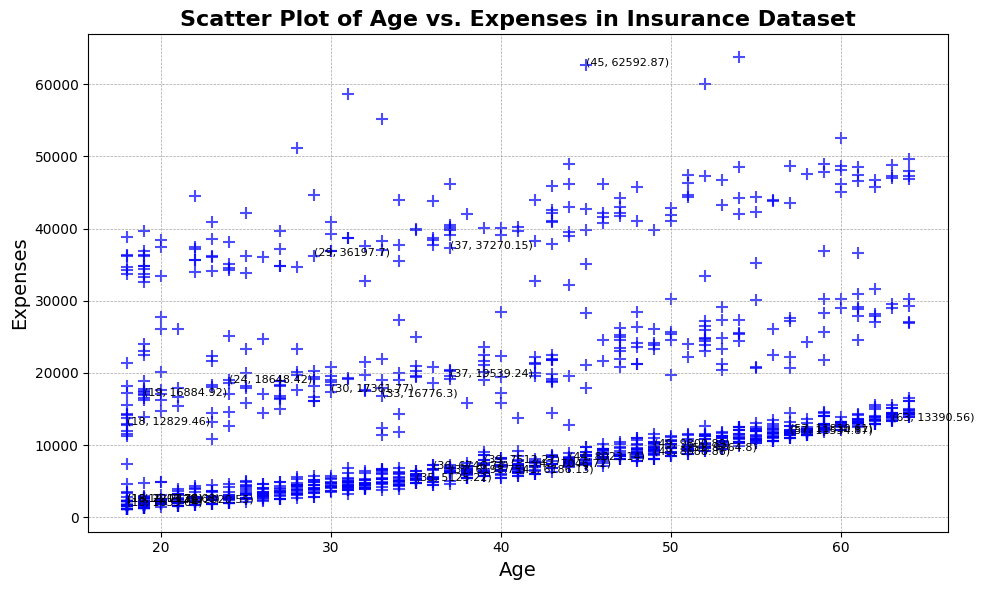

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot: Age vs. Expenses
plt.figure(figsize=(10, 6))
plt.scatter(
    insurance_data['age'],
    insurance_data['expenses'],
    c='blue',
    marker='+',
    alpha=0.7,
    edgecolor='black',
    s=80
)

# Adding annotations for specific points
for i in range(len(insurance_data)):
    if i % 50 == 0:  # Annotate every 50th point
        plt.text(
            insurance_data['age'][i],
            insurance_data['expenses'][i],
            f"({insurance_data['age'][i]}, {insurance_data['expenses'][i]})",
            fontsize=8
        )

# Customizing the plot
plt.title('Scatter Plot of Age vs. Expenses in Insurance Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Expenses', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


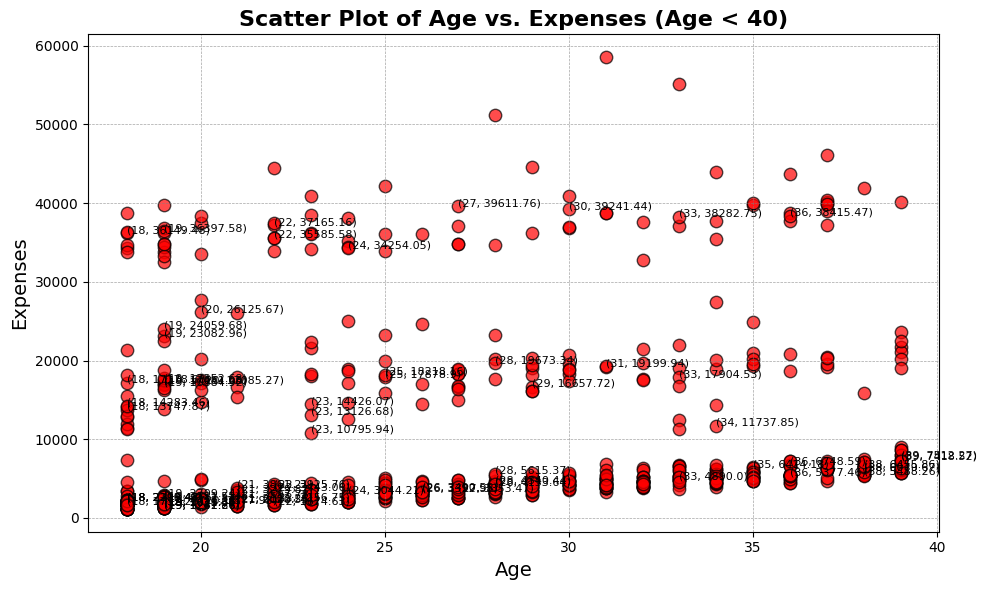

In [ ]:
# Filter the dataset: Only include rows where age is less than 40
filtered_data = insurance_data[insurance_data['age'] < 40]

# Scatter plot for filtered data: Age vs. Expenses
plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_data['age'],
    filtered_data['expenses'],
    c='red',
    marker='o',
    alpha=0.7,
    edgecolor='black',
    s=80
)

# Adding annotations for specific points
for i in range(len(filtered_data)):
    if i % 10 == 0:  # Annotate every 10th point
        plt.text(
            filtered_data['age'].iloc[i],
            filtered_data['expenses'].iloc[i],
            f"({filtered_data['age'].iloc[i]}, {filtered_data['expenses'].iloc[i]})",
            fontsize=8
        )

# Customizing the plot
plt.title('Scatter Plot of Age vs. Expenses (Age < 40)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Expenses', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
string_columns = ['sex', 'smoker', 'region']

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    insurance_data[col] = le.fit_transform(insurance_data[col])
    label_encoders[col] = le  # Store the encoder for potential reverse transformation

print(insurance_data.head())
print("dataset shape:")
print(insurance_data.shape)
print("columns:")
insurance_data.columns

   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86
dataset shape:
(1338, 7)
columns:


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')